#Regresión lineal 




1.Carga Librerías 

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databaset_para_trabajar_sklearn/mercadeo_bancario.csv')
df.head()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1


2.filtramos el dataframe a las variables correspondientes 

In [ ]:
df = df[['edad', 'total_hijos', 'contacto', 'mes', 'si_no']]
df.head()

,edad,total_hijos,contacto,mes,si_no
0,44,7,cellular,aug,0
1,53,1,cellular,nov,0
2,28,3,cellular,jun,1
3,39,1,cellular,apr,0
4,55,2,cellular,aug,1


In [ ]:
print(f'Cantidad de Filas: {df.shape[0]}')
print(f'Valore Null: {df.isnull().values.any()}')

Cantidad de Filas: 41188
Valore Null: False


In [ ]:
df.groupby(['si_no']).agg({'edad': 'mean'})

,edad
si_no,
0,39.911185
1,40.913147


Convertir variables categoricas a númericas

In [ ]:
from sklearn.preprocessing  import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[['contacto','mes']])
print(enc.categories_)
enc.transform(df[['contacto','mes']].values)

[array(['cellular', 'telephone'], dtype=object), array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep'], dtype=object)]


array([[0., 1.],
       [0., 7.],
       [0., 4.],
       ...,
       [1., 6.],
       [1., 8.],
       [1., 6.]])

mostrar colomnas en un nuevo dataframe con las variables correspondientes



In [ ]:
categorical_cols = ['contacto','mes']
df_processed = pd.DataFrame(enc.transform(df[categorical_cols].values), columns=categorical_cols, dtype='int')
df_processed['edad'], df_processed['total_hijos']=df['edad'],df['total_hijos']
df_processed['si_no']= df['si_no']
df_processed.head()

,contacto,mes,edad,total_hijos,si_no
0,0,1,44,7,0
1,0,7,53,1,0
2,0,4,28,3,1
3,0,0,39,1,0
4,0,1,55,2,1


cantidad de valores unicos


In [ ]:
for col in df.columns:
  print(f'Columna: {col} - Cantidad de valores únicos: {len(df[col].unique())}')

Columna: edad - Cantidad de valores únicos: 78
Columna: total_hijos - Cantidad de valores únicos: 9
Columna: contacto - Cantidad de valores únicos: 2
Columna: mes - Cantidad de valores únicos: 10
Columna: si_no - Cantidad de valores únicos: 2


describir informacion del dataframe de edad


In [ ]:
df.edad.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: edad, dtype: float64

describir informacion del dataframe de total hijos


In [ ]:
df.total_hijos.describe()

count    41188.000000
mean         3.984680
std          2.583405
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          8.000000
Name: total_hijos, dtype: float64

describir informacion del dataframe de mes

1.   Elemento de la lista
2.   Elemento de la lista



In [ ]:
df.mes.describe()

count     41188
unique       10
top         may
freq      13769
Name: mes, dtype: object

describir informacion del dataframe de contacto

In [ ]:
df.contacto.describe()

count        41188
unique           2
top       cellular
freq         26144
Name: contacto, dtype: object

campana gausiana

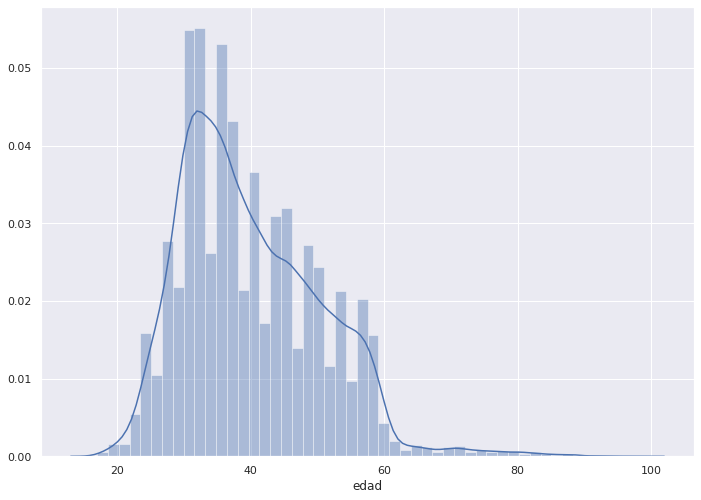

In [ ]:

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['edad'])
plt.show()


matriz de correlacion

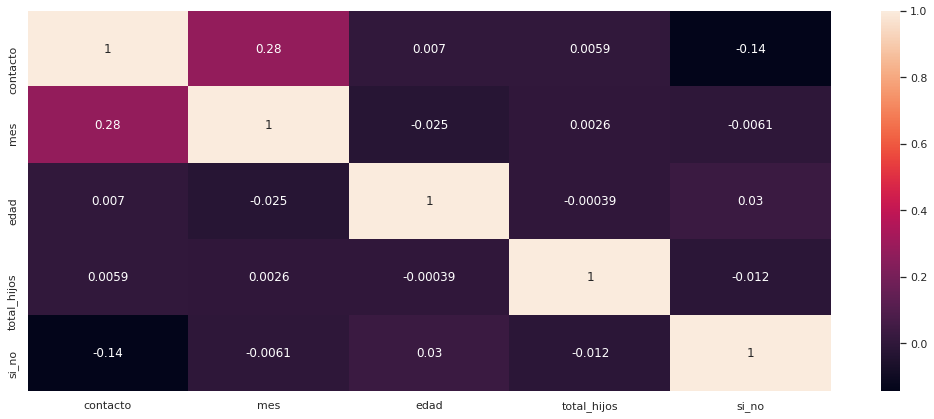

In [ ]:
sns.set(rc={'figure.figsize':(18,7)})
sns.heatmap(data=df_processed.corr(), annot=True)

GRAFICOS DE DISPERSION

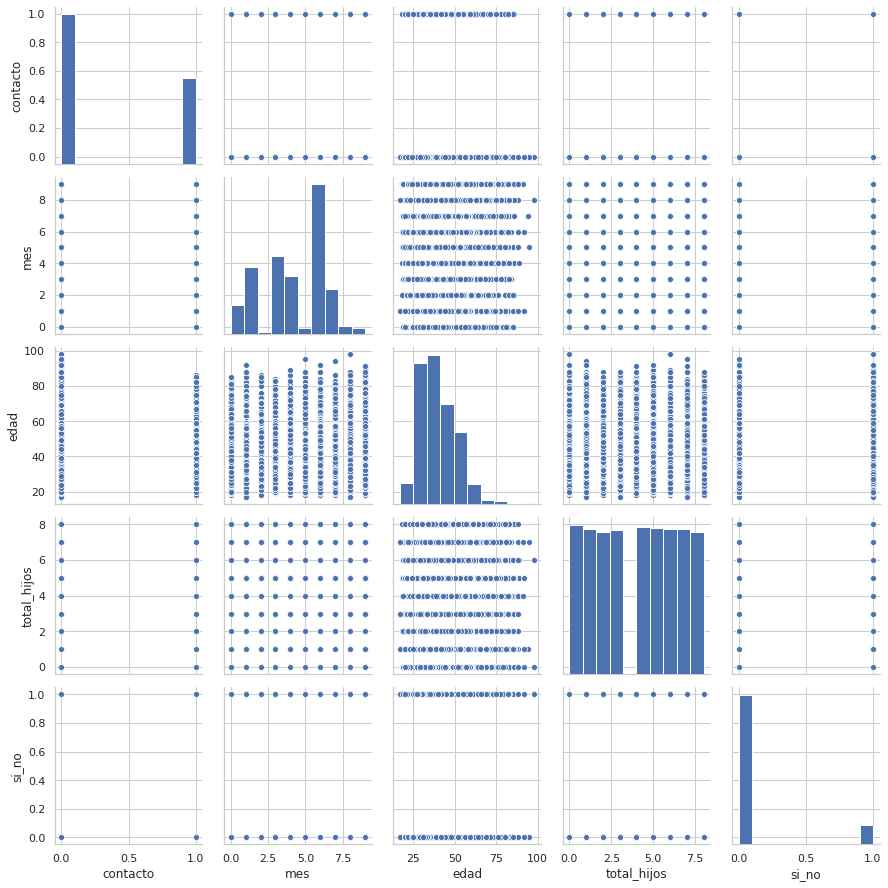

In [ ]:
sns.set(style='whitegrid',context='notebook')
sns.pairplot(df_processed[df_processed.columns])
plt.tight_layout()
plt.show()

Regresión Lineal con todas nuestras variables

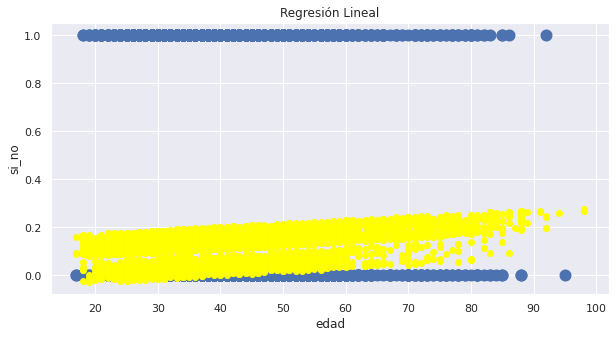


 Presición del modelo
0.028448980578363647


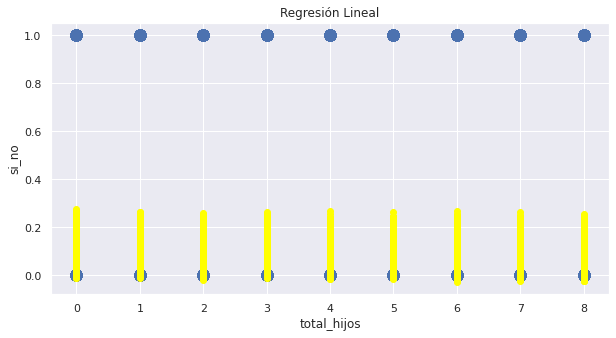


 Presición del modelo
0.028448980578363647


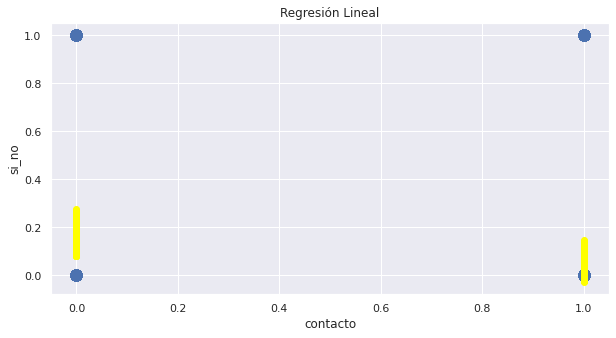


 Presición del modelo
0.028448980578363647


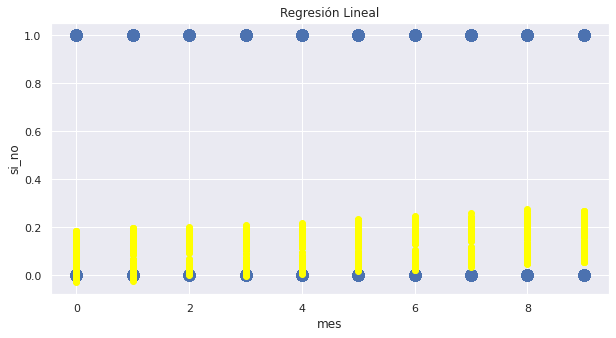


 Presición del modelo
0.028448980578363647


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model  import LogisticRegression
x = df_processed[df.columns[:-1]]
y = df_processed['si_no']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.8)
regressor= LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
sns.set(rc={'figure.figsize':(10,5)})
for col in df.columns[:-1]:
  plt.scatter(x_train[col], y_train, linewidth=6)
  plt.scatter(x_test[col], y_pred, color='yellow', linewidth=1)
  plt.title('Regresión Lineal')
  plt.xlabel(col)
  plt.ylabel('si_no')
  plt.show()
  print('\n Presición del modelo')
  print(regressor.score(x_train, y_train))

Regresión Logistica

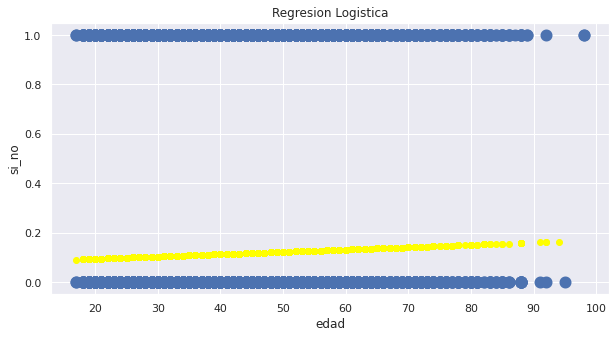

PRESICION DEL MODELO 
0.0009506280227695729


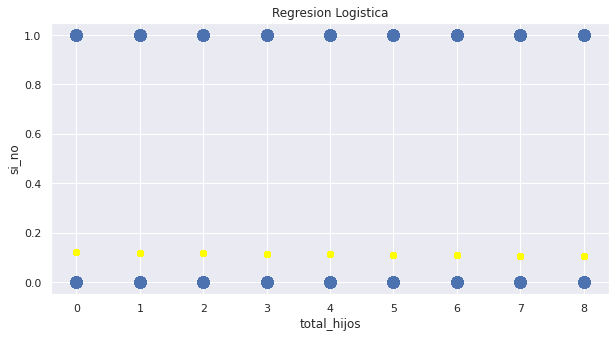

PRESICION DEL MODELO 
0.000289092577514638


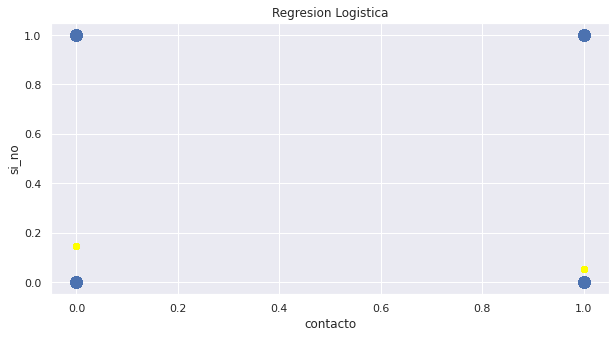

PRESICION DEL MODELO 
0.02104515583192701


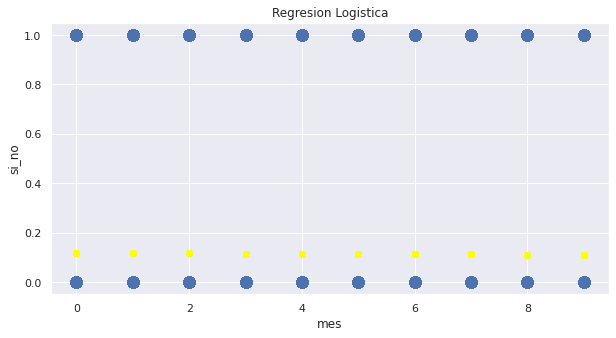

PRESICION DEL MODELO 
3.0257164859270883e-05


In [ ]:
for col in  df.columns[:-1]:
  x= df_processed[[col]]
  y= df_processed['si_no']

  x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.2)

  regressor = LinearRegression()
  log_regresor = regressor.fit(x_train,y_train)
  y_pred = log_regresor.predict(x_test)

  sns.set(rc={'figure.figsize':(10,5)})

  plt.scatter(x_train[col],y_train,linewidth=6)
  plt.scatter(x_test[col],y_pred,color='yellow',linewidths=1)
  plt.title('Regresion Logistica')
  plt.xlabel(col)
  plt.ylabel('si_no')
  plt.show()

  print('PRESICION DEL MODELO ')
  print(regressor.score(x_train,y_train))